In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
df = pd.read_csv('/kaggle/input/ted-talks/data.csv')

/kaggle/input/ted-talks/data.csv


## 1.1) Dataset Walkthrough

In [2]:
df.head()

,title,author,date,views,likes,link
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...


In [3]:
df.isnull().sum()

title     0
author    1
date      0
views     0
likes     0
link      0
dtype: int64

#### Here you can see we're having one null value in author so lets delete that row so that we'll have clean data

In [4]:
df.dropna(inplace = True)

In [5]:
df.isnull().sum()

title     0
author    0
date      0
views     0
likes     0
link      0
dtype: int64

#### As you can see now we're not having anul null value so can start exploring the dataset and answering the question asked by the author i.e me 😁

## 2.1) Finding the most popular TED talks

In [6]:
df.sort_values(by = 'views', ascending = False)

,title,author,date,views,likes,link
5436,Do schools kill creativity?,Sir Ken Robinson,February 2006,72000000,2100000,https://ted.com/talks/sir_ken_robinson_do_scho...
4084,Your body language may shape who you are,Amy Cuddy,June 2012,64000000,1900000,https://ted.com/talks/amy_cuddy_your_body_lang...
2958,Inside the mind of a master procrastinator,Tim Urban,February 2016,60000000,1800000,https://ted.com/talks/tim_urban_inside_the_min...
4765,How great leaders inspire action,Simon Sinek,September 2009,57000000,1700000,https://ted.com/talks/simon_sinek_how_great_le...
4605,The power of vulnerability,Brené Brown,June 2010,56000000,1700000,https://ted.com/talks/brene_brown_the_power_of...
...,...,...,...,...,...,...
478,The case for public media,Qi Wu 吴琪,November 2020,1500,47,https://ted.com/talks/qi_wu_the_case_for_publi...
1692,"""Part II. The Journey Through Time"" / ""Ruslan ...",Deutsche Philharmonie Merck,November 2018,1300,40,https://ted.com/talks/deutsche_philharmonie_me...
1064,"""Jamie Raeburn"" / ""Baloo Baleerie"" / ""Twa recr...",Findlay Napier and Gillian Frame,July 2019,1300,40,https://ted.com/talks/findlay_napier_and_gilli...
552,Virtual Worlds,Far Flung,November 2020,1300,39,https://ted.com/talks/far_flung_virtual_worlds


## 2.2) Finding the most popular TED talks Speaker (in terms of number of talks)

In [7]:
df.groupby('author').size().sort_values(ascending = False).head()

author
Alex Gendler        45
Iseult Gillespie    33
Matt Walker         18
Alex Rosenthal      15
Elizabeth Cox       13
dtype: int64

## 2.3) Month-wise Analysis of TED talk frequency

In [8]:
month = []
year = []

for date in df['date']:
    month.append(date.split(' ')[0])
    year.append(date.split(' ')[1]) 
    
df['month'] = month
df['year'] = year

df.head()

,title,author,date,views,likes,link,month,year
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...,December,2021
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...,February,2022
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...,September,2021
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...,October,2021
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...,October,2021


<AxesSubplot:xlabel='month'>

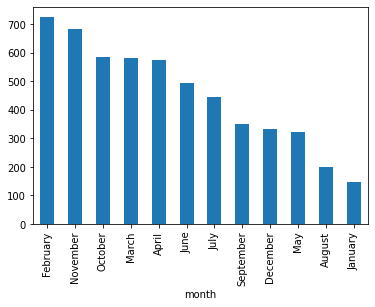

In [9]:
df.groupby('month').size().sort_values(ascending = False).plot(kind = 'bar')

## 2.4) Year-wise Analysis of TED talk frequency

<AxesSubplot:xlabel='year'>

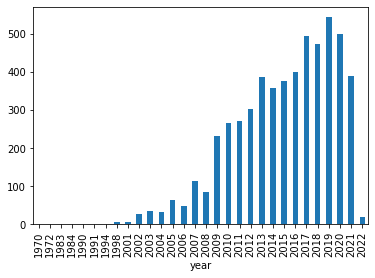

In [10]:
df.groupby('year').size().plot(kind = 'bar')

## 2.5) Finding TED talks of your favorite Author

In [11]:
df[df['author'] == 'Alex Gendler']

,title,author,date,views,likes,link,month,year
66,"Blood, concrete, and dynamite: Building the Ho...",Alex Gendler,December 2021,724000,21000,https://ted.com/talks/alex_gendler_blood_concr...,December,2021
329,The woman who stared at the sun,Alex Gendler,May 2021,1900000,57000,https://ted.com/talks/alex_gendler_the_woman_w...,May,2021
348,How one design flaw almost toppled a skyscraper,Alex Gendler,May 2021,712000,21000,https://ted.com/talks/alex_gendler_how_one_des...,May,2021
358,"Demolition, disease, and death: Building the P...",Alex Gendler,April 2021,724000,21000,https://ted.com/talks/alex_gendler_demolition_...,April,2021
367,How the world's tallest skyscraper was built,Alex Gendler,April 2021,770000,23000,https://ted.com/talks/alex_gendler_how_the_wor...,April,2021
372,Why are airplanes slower than they used to be?,Alex Gendler,April 2021,2200000,66000,https://ted.com/talks/alex_gendler_why_are_air...,April,2021
522,Building the world's largest (and most controv...,Alex Gendler,December 2020,810000,24000,https://ted.com/talks/alex_gendler_building_th...,December,2020
525,Can you solve the monster duel riddle?,Alex Gendler,December 2020,1800000,55000,https://ted.com/talks/alex_gendler_can_you_sol...,December,2020
548,Can you solve the Alice in Wonderland riddle?,Alex Gendler,November 2020,1600000,48000,https://ted.com/talks/alex_gendler_can_you_sol...,November,2020
757,The Egyptian myth of the death of Osiris,Alex Gendler,July 2020,2500000,77000,https://ted.com/talks/alex_gendler_the_egyptia...,July,2020


## 2.6) Finding TED talks with the best view to like ration

In [12]:
ratio = []

data = df.values

for i in range(len(data)):
    ratio.append(data[i][3] / data[i][4])    
    
df['v&l_ratio'] = ratio

df.sort_values(by = 'v&l_ratio', ascending = False).head()

,title,author,date,views,likes,link,month,year,v&l_ratio
955,A camera that can see around corners,David Lindell,November 2019,364000,10000,https://ted.com/talks/david_lindell_a_camera_t...,November,2019,36.4
905,What's the point(e) of ballet?,Ming Luke,April 2020,364000,10000,https://ted.com/talks/ming_luke_what_s_the_poi...,April,2020,36.4
837,How to see more and care less: The art of Geor...,Iseult Gillespie,June 2020,364000,10000,https://ted.com/talks/iseult_gillespie_how_to_...,June,2020,36.4
26,Can you outsmart the fallacy that divided a na...,Elizabeth Cox,February 2022,363000,10000,https://ted.com/talks/elizabeth_cox_can_you_ou...,February,2022,36.3
1016,The function and fashion of eyeglasses,Debbie Millman,January 2020,363000,10000,https://ted.com/talks/debbie_millman_the_funct...,January,2020,36.3


## 2.7) Finding TED talks based on tags(like climate) 

In [13]:
tag = 'education'

data = df.values

for i in range(len(data)):
    if (tag in data[i][0].lower()):
        print(data[i][0], data[i][5])

Sex education should start with consent https://ted.com/talks/kaz_sex_education_should_start_with_consent
Education is a fundamental right for every child https://ted.com/talks/makhtoum_abdalla_education_is_a_fundamental_right_for_every_child
3 ways to lower the barriers to higher education https://ted.com/talks/adrian_k_haugabrook_3_ways_to_lower_the_barriers_to_higher_education
What COVID-19 revealed about US schools — and 4 ways to rethink education https://ted.com/talks/nora_flanagan_what_covid_19_revealed_about_us_schools_and_4_ways_to_rethink_education
Rethinking education and celebrating the Arabic language https://ted.com/talks/ahmad_m_hasnah_rethinking_education_and_celebrating_the_arabic_language
A path to higher education and employment for refugees https://ted.com/talks/chrystina_russell_a_path_to_higher_education_and_employment_for_refugees
The "opportunity gap" in US public education — and how to close it https://ted.com/talks/anindya_kundu_the_opportunity_gap_in_us_publi

## 2.8) Finding the most popular TED talks Speaker (in terms of number of views)

In [14]:
df.groupby('author').sum()['views'].sort_values(ascending = False).head()

author
Alex Gendler        187196000
Sir Ken Robinson     95654000
Bill Gates           77800000
Simon Sinek          74800000
Brené Brown          72000000
Name: views, dtype: int64